# Ejercicio con historiales crediticios

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
mipath = 'australian.dat'
data = pd.read_csv(mipath, sep=" ", header=None)
data.columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12","A13", "A14", "class"]
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  class   690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [36]:
X = data.iloc[:, :-1]
y = data[["class"]]

In [37]:
print("Total de datos: ", y.shape[0])
print("Total de los datos de la clase positiva: ", sum( y["class"] ))

print("Porcentaje de datos de la clase positiva: %1f%%" %( 100*sum( y["class"] ) / y.shape[0] ))
print("Porcentaje de datos de la clase negativa: %1f%%" %(100*(1-sum(y["class"])/y.shape[0])))


Total de datos:  690
Total de los datos de la clase positiva:  307
Porcentaje de datos de la clase positiva: 44.492754%
Porcentaje de datos de la clase negativa: 55.507246%


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=45)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(414, 14)
(414, 1)
(276, 14)
(276, 1)


In [40]:
dt = DecisionTreeClassifier()

In [41]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
dt.score(X_test, y_test)

0.8152173913043478

In [43]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_split=6)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8514492753623188

Árbol de Decisión con parámetros por default
Promedio y desviación estándar 82.862319% (0.8)


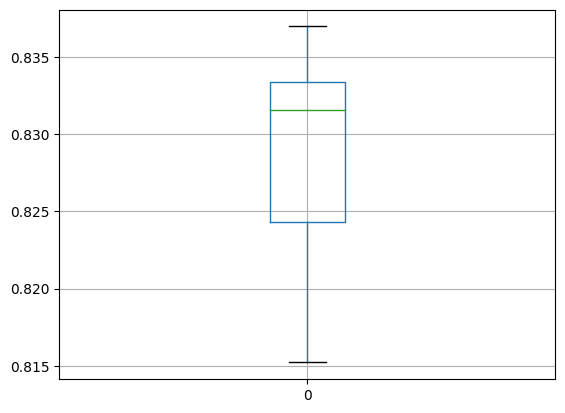

In [44]:
n_for = 10
accAD = list() #Variable que guardará los resultados obtenidos

for k in range(n_for):
    modelo_AD = DecisionTreeClassifier() #Inicializando el modelo por default

    modelo_AD.fit(X_train, y_train) #Entrenando el modelo
    tmp = modelo_AD.score(X_test, y_test) #Validando el modelo
    accAD.append(tmp)

print('Árbol de Decisión con parámetros por default\nPromedio y desviación estándar %1f%% (%.1f)' % (100*np.mean(accAD), 100*np.std(accAD)))

pd.DataFrame(accAD).boxplot()
plt.show()

In [45]:
accAD

[0.8152173913043478,
 0.8297101449275363,
 0.822463768115942,
 0.8152173913043478,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8369565217391305,
 0.8369565217391305,
 0.8297101449275363]

Árbol de Decisión
Exactitud(Accuracy) con parámetros ajustados:
Train:	86.23% 
Test:	86.59%


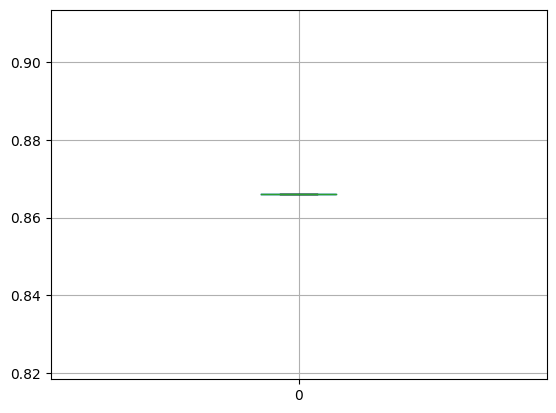

In [46]:
n_for = 10
accAD2 = list() #Variable que guardará los resultados obtenidos

for k in range(n_for):
    #Inicializando el modelo por default
    modelo_AD = DecisionTreeClassifier(criterion="entropy", #'gini' 'entropy'
                                       max_depth=10, #menos de 20, si son millones
                                       min_samples_split=0.1,#10% de los datos de
                                       min_samples_leaf=0.01)

    modelo_AD.fit(X_train, y_train) #Entrenando el modelo
    tmp = modelo_AD.score(X_test, y_test) #Validando el modelo
    accAD2.append(tmp)

print("Árbol de Decisión\nExactitud(Accuracy) con parámetros ajustados:\nTrain:\t%.2f%% \nTest:\t%.2f%%"
      %(100*modelo_AD.score(X_train, y_train), 100*modelo_AD.score(X_test, y_test)))

pd.DataFrame(accAD2).boxplot()
plt.show()

In [47]:
accAD2

[0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072]

In [48]:
ddff = pd.DataFrame(list(zip(accAD, accAD2)), columns=["default", "ajustado"])
ddff

,default,ajustado
0,0.815217,0.865942
1,0.829710,0.865942
2,0.822464,0.865942
3,0.815217,0.865942
4,0.833333,0.865942
5,0.833333,0.865942
6,0.833333,0.865942
7,0.836957,0.865942
8,0.836957,0.865942
9,0.829710,0.865942


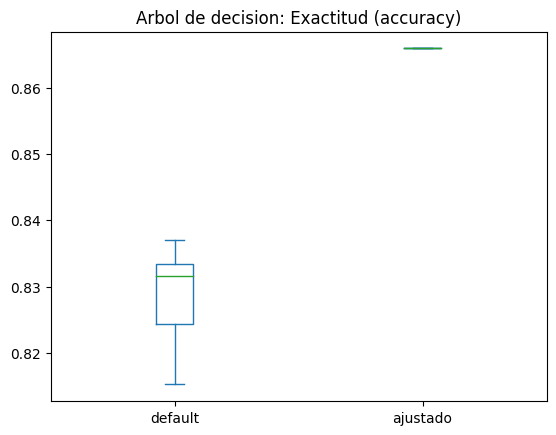

In [49]:
#Dibujamos los boxplot del dataframe
ddff.plot(kind='box')
plt.title('Arbol de decision: Exactitud (accuracy)')
plt.show()

# Cross Validation para Random Forest

In [50]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [51]:
#Lo primero que tenemos que hacer es crear nuestra malla de valores
#para el random forest casssifier

grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4,5,6,7,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [18] 
}

In [52]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=5)
rf_cv.fit(X_train, y_train)

c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\usuario\AppData\Local\Pro

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [53]:
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}

In [54]:
rf_cv.best_score_

0.8720246841022627

In [60]:
rf2 = RandomForestClassifier(max_depth = 7,
                             max_features = 'sqrt',
                             n_estimators = 300,
                             random_state = 18,
                             criterion='entropy').fit(X_train, np.ravel(y_train))

In [61]:
y_pred = rf2.predict(X_test)
accuracy_score(y_test, y_pred)

0.8913043478260869

In [62]:
confusion_matrix(y_test, y_pred)

array([[148,  14],
       [ 16,  98]], dtype=int64)

In [63]:
f1_score(y_test, y_pred)

0.8672566371681416